## LAMINI Narimene - Guettaf Sarah  - G4

# TP 4 Regression logistique avec régularisation
Dans ce TP, nous aimerions faire une classification binaire en utilisant la régression.

Pour ce faire, nous étudierons un ensemble de données avec la variable  (y) representant la commercialisation d'un profuit et les caractéristiques (X) representant les résultat des tests de qualité test 1 et test 2 du produit.

La prédiction se fera avec l'agorithme de descente du gradient avec régularisation.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import scipy.optimize as opt    

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [4]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(118, 3)

Dans ces données (data), la première colonne represente la première test, la deuxieme colonne le deuxième test et la troisième colonne represente la commercialisation (1 oui 0 non).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [5]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [6]:
print('X', X.shape ,' y ', y.shape)

X (118, 3)  y  (118, 1)


# Transformation de données
Dans cette partie, nous aimerions transformer nos données afin d'avoir une fonction polynomiale de degrée 6.

La fonction sera:

$x_0=1$

$x_1=x_1$

$x_2=x_2$

$x_3={x_1}^2$

$x_4={x_1}x_2$

$x_5={x_2}^2$

$x_6={x_1}^3$

$x_7={x_1}^2 x_2$

$x_8= x_1 {x_2}^2$

$x_9= {x_2}^3$

...


Pour un polynme de degrée 6 à 2 variables nous aurons 28 caracteristiques

**Question**: comment avons nous trouvé ce chiffre?

**Astuce**: référez vous aux probabilités

**Réponse** : (6! / (6-2)! ) - 2 = 28

In [238]:
def mapping(X):
    
    cols = 28
    degree=7
    outX= np.ones((X.shape[0],cols))
    X1=X[:,1]
    X2=X[:,2]
    k=0
    for i in range(degree):
        for j in range(i+1):
            outX[:, k] = np.power(X1,i-j)*(np.power(X2,j));
            k=k+1
    return outX    


In [41]:
X2=mapping(X)
X2.shape

(118, 28)

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [214]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z));
 

In [215]:
k=sigmoid(-10)
k

4.5397868702434395e-05

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [216]:
def computeCostReg(X, y, theta,lambdaa):
    z = np.dot(X,theta)
    first = y.T.dot(np.log(Sigmoid(z)))
    second = ((1-y).T).dot(np.log(1-Sigmoid(z)))
    reg = (lambdaa / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.T.shape[1]], 2))
    cost = -((first + second))/len(y) + reg
    
 
    return  cost


2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [224]:
def gradientDescent(X, y, theta, alpha,iterations,lambdaa):
   
    length = len(y)
    cost = np.zeros((iterations,1))
    for i in range(iterations):
        z = np.dot(X,theta)
        theta[0,0] = theta[0,0] - (alpha / len(y))*np.sum(np.subtract(Sigmoid(z), y)*X[:,0])
        theta[1:,:] = theta[1:,:] - (1-(alpha*lambdaa) / len(y)) *np.array(np.sum(np.subtract(Sigmoid(z), y)*X[:,1:], axis=0))[np.newaxis].T
        cost[i] = computeCostReg(X,y,theta,lambdaa)   
    return theta, cost



# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [225]:
n=X2.shape[1]
lambdaa = 1;
theta = np.zeros((n, 1))
theta.T.shape[1]

28

Calculer le cout initial

In [226]:
initialCost=computeCostReg(X2, y, theta, lambdaa)
print(initialCost)

[[0.69314718]]


Normalisation des données

In [227]:
y_norm=np.ones(y.shape)
std = np.std(y)
mu = np.mean(y)
y_norm = np.true_divide((y- mu),std)

X2_norm=np.ones(X2.shape)
for i in range(1,X2.shape[1]):
    std = np.std(X2[:,i])
    mu = np.mean(X2[:,i])
    X2_norm[:,i] = np.true_divide((X2[:,i]- mu),std)

Appel des la fonction de calcul du gradient

In [233]:
# paramètres
iterations = 1500;
alpha = 0.01;

# paramètre de regression
lambdaa = 1;

# Appel
new_theta, new_cost = gradientDescent(X2, y, theta, alpha,iterations,lambdaa);
new_theta



array([[ 2.81046010e+00],
       [-1.78551413e+00],
       [-1.28519450e-02],
       [-2.45522283e+01],
       [-1.60454383e+01],
       [ 1.79887440e+01],
       [-8.19161937e+00],
       [ 3.40294577e+01],
       [ 4.00376451e+01],
       [ 3.68442419e+01],
       [ 1.24478722e+02],
       [ 3.08011233e+01],
       [ 2.14926356e+01],
       [-2.01514656e-01],
       [-5.40026483e+01],
       [ 3.84336757e+01],
       [-1.39691053e+01],
       [-3.68698938e+00],
       [-7.59214192e+01],
       [-2.02636242e+01],
       [-2.76217704e+00],
       [-1.99772574e+02],
       [-1.05891920e+02],
       [-4.11999938e+01],
       [ 1.54792229e+02],
       [-1.75854744e+02],
       [-1.28399736e+02],
       [-1.35652172e+01]])

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [234]:
def mapFeatureForPlotting(X1, X2):
        degree = 6
        out = np.ones(1)
        for i in range(1, degree+1):
            for j in range(i+1):
                out = np.hstack((out, np.multiply(np.power(X1, i-j),np.power(X2, j))))
        return out

# Classification (Prédiction)
Ici il serait interessant de calculer la prédiction en utilisant un seuil
i.e. si h>seuil alors classe =1 sinon classe = 0

In [235]:
def predict(theta, X):
    z = np.dot(X,theta)
    probability = sigmoid(z)
    y_pred = [1 if x >= 0.5 else 0 for x in probability]
    return y_pred



In [240]:
def drawCircle(theta):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u),len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
             z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)
    plt.contour(u,v,z,0)

# Affichage 
Graphe representant les acceptations selon les caracteristiques

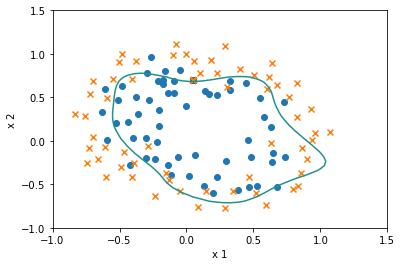

In [242]:
plt.scatter(X2[np.where(y==1),1],X2[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X2[np.where(y==0),1],X2[np.where(y==0),2], label="y=0",marker ='x')
plt.xlabel('x 1')
plt.ylabel('x 2')
drawCircle(new_theta)

Traçage du coût en fonction de theta0 et theta1

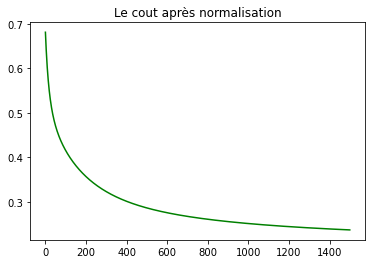

In [201]:
plt.plot(range(iterations), cost, label= 'Le cout après normalisation', color = "green")
plt.title('Le cout après normalisation')
plt.show()

# Qualité du classifieur

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [237]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(new_theta, X2_norm)
prcision = np.mean(y==y_pred)*100
prcision



<ipython-input-42-3a23a140e4ab>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z));


49.612180407928754

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [152]:
#predection en utilisant la librairie sklearn 
model = LogisticRegression()
y_pred = model.fit(X2_norm,y).predict(X2_norm)

print('Result 01 :\n')
print(classification_report(y, y_pred))

print("======================================================================================")

#predection en utilisant notre modèle
y_pred = predict(new_theta, X2_norm)
print('Result 02 :\n')
print(classification_report(y, y_pred))

Result 01 :

              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83        60
         1.0       0.81      0.86      0.83        58

    accuracy                           0.83       118
   macro avg       0.83      0.83      0.83       118
weighted avg       0.83      0.83      0.83       118

Result 02 :

              precision    recall  f1-score   support

         0.0       0.82      0.55      0.66        60
         1.0       0.65      0.88      0.75        58

    accuracy                           0.71       118
   macro avg       0.74      0.71      0.70       118
weighted avg       0.74      0.71      0.70       118



D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

-faire varier lambda pour s'approcher de la meilleure valeur qui n'engendre pas un sous-apprentissage ou un sur-apprentissage.

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 01 Avril 2022 à 22h


# bonne chance